In [28]:
import numpy as np
import numpy.linalg as npl
import math
import matplotlib.pyplot as plt
import scipy.io as sio

** **
** **

**Porblem 6 Part (a)**

** **
** **

In [29]:
n = 30; m = 10000;
x = np.cos(2 * np.pi * 0.075 * np.arange(1,n+1))
A = np.random.randn(m,n)
z = np.abs(A @ x)

In [30]:
R = np.zeros((n,n)) # Initialize the matrix R

for i in range(m):
    a_i = A[i, :] # i-th row of the matrix A
    R = R + (z[i] ** 2) * np.outer(a_i, a_i) # np.outer(a_i, a_i) is calculation for (a_i)(a_i)^T
    
R = R/m # Shape of R is 30 x 30

In [31]:
R # 30 x 30

array([[ 1.56776866e+01,  6.15118916e-01,  2.54649841e-01,
        -5.78032155e-01, -6.95982534e-01, -1.32434374e+00,
        -1.50220057e+00, -1.72305946e+00, -9.35257421e-01,
        -4.18259104e-01,  6.88267936e-01,  1.37739831e+00,
         1.80766033e+00,  1.50630921e+00,  1.29866400e+00,
         9.45431501e-01,  1.98591270e-01, -1.43225411e+00,
        -1.74192578e+00, -1.60532402e+00, -1.48019403e+00,
        -1.39579880e+00, -5.02762647e-02,  3.51909205e-01,
         1.20101109e+00,  1.91764073e+00,  1.78273220e+00,
         1.14340920e+00,  7.97807794e-01,  3.61418219e-01],
       [ 6.15118916e-01,  1.49124042e+01,  1.92322881e-01,
        -1.65681739e-01, -7.88752651e-01, -1.16459346e+00,
        -1.42167372e+00, -1.09244712e+00, -5.86180181e-01,
        -2.15406500e-01,  4.24674404e-01,  9.43182205e-01,
         1.02410714e+00,  9.67486472e-01,  1.04607942e+00,
         2.20718377e-01, -2.48927954e-01, -7.56965647e-01,
        -8.81398740e-01, -9.33791621e-01, -1.06618895e+

In [32]:
eigenVal, eigenVec = np.linalg.eig(R)

largest_eigenVal = np.argmax(eigenVal) # Finding the largest eigenvalue 
x_estimation = eigenVec[:, largest_eigenVal] # Extracting the eigenvector which includes the largest eigenvalue

<StemContainer object of 3 artists>

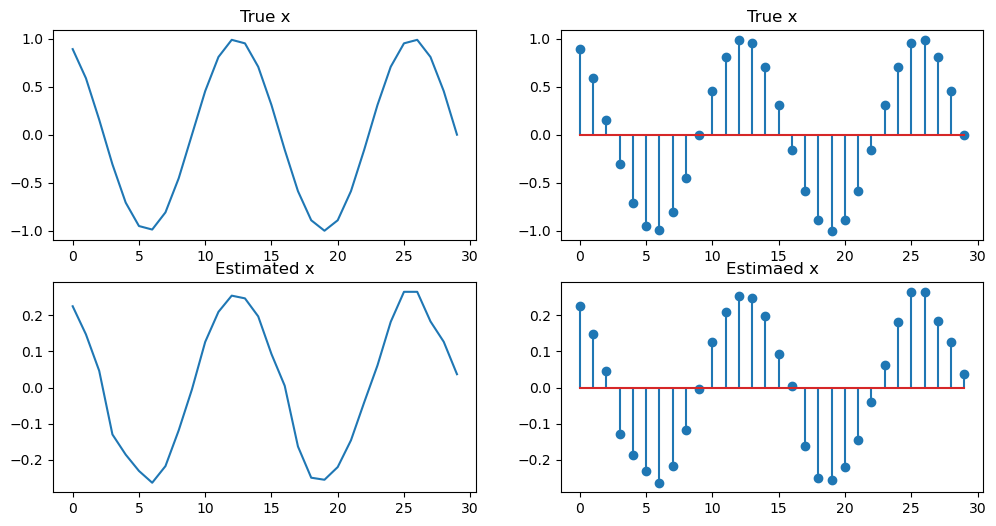

In [33]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.title("True x")
plt.plot(x)

plt.subplot(2,2,2)
plt.title("True x")
plt.stem(x)

plt.subplot(2,2,3)
plt.title("Estimated x")
plt.plot(x_estimation)

plt.subplot(2,2,4)
plt.title("Estimaed x")
plt.stem(x_estimation)

** **
** **

**Porblem 6 Part (b)**

** **
** **

In [34]:
mat_contents = sio.loadmat('hw2-prob4.mat');

A = mat_contents['A'];
z = mat_contents['z'];

In [35]:
np.shape(A), np.shape(z)

((20000, 900), (20000, 1))

In [36]:
# Similar to the part (a), 

R = np.zeros((900,900)) # Initialize the 900 x 900 matrix R

for i in range(20000):
    
    R = R + (z[i] ** 2) * np.outer(A[i], A[i]) # np.outer(a_i, a_i) is calculation for (a_i)(a_i)^T
    
R = R/20000 # Shape of R is 900 x 900

In [37]:
np.shape(R)

(900, 900)

In [38]:
eigenVal, eigenVec = np.linalg.eig(R)

largest_eigenVal = np.argmax(eigenVal) # Finding the largest eigenvalue 
x_hat = eigenVec[:, largest_eigenVal] # Extracting the eigenvector which includes the largest eigenvalue

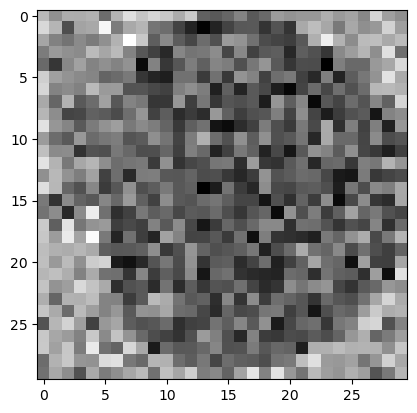

In [39]:
xhat=np.sign(np.sum(x_hat))*x_hat;
plt.imshow(np.reshape(xhat,[30,30]),cmap='gray');